# Name: Snehal Shyam Jagtap

# CLUSTERING ANALYSIS

## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.



## 1. Data Preprocessing:

In [1]:
# Importing essential libraries
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
data = pd.read_csv('EastWestAirlines.csv')

In [4]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data.shape

(3999, 12)

In [7]:
processed_data = data.drop(['ID#', 'Award?'], axis=1)

In [8]:
# Scaling the features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

In [9]:
# Elbow Method to find optimal number of clusters for K-Means
inertia_values = []
cluster_range = range(1, 11)

In [10]:
for clusters in cluster_range:
    kmeans_model = KMeans(n_clusters=clusters, random_state=42)
    kmeans_model.fit(scaled_data)
    inertia_values.append(kmeans_model.inertia_)

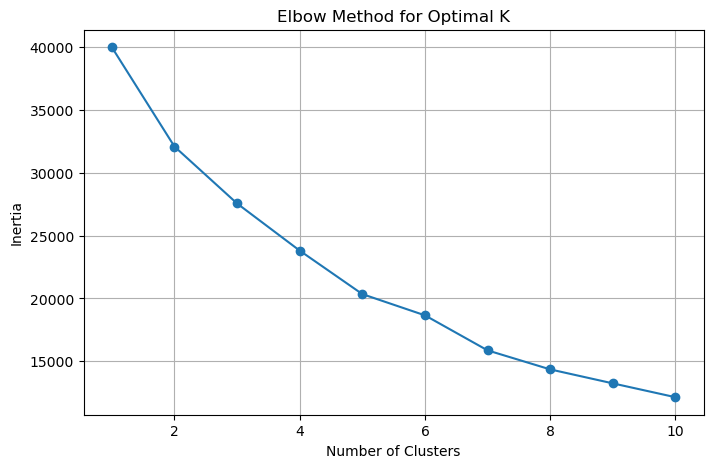

In [11]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [12]:
# Selecting optimal clusters and fitting K-Means
optimal_clusters = 3  # Determined from the elbow method
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['KMeans_Cluster'] = final_kmeans.fit_predict(scaled_data)

In [13]:
# Evaluating K-Means with silhouette score
kmeans_silhouette = silhouette_score(scaled_data, data['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.3303711060539158


In [14]:
# Visualizing K-Means clusters in reduced dimensions (PCA)
pca_kmeans = PCA(n_components=2)
pca_data_kmeans = pca_kmeans.fit_transform(scaled_data)

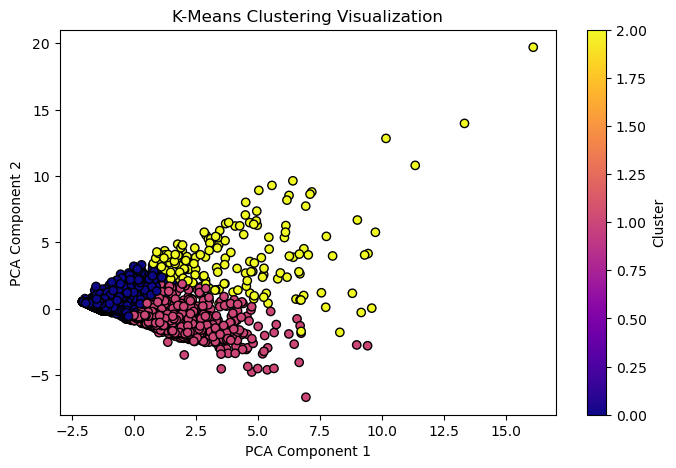

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_data_kmeans[:, 0], pca_data_kmeans[:, 1], c=data['KMeans_Cluster'], cmap='plasma', edgecolor='k')
plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [16]:
# DBSCAN Implementation
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan_model.fit_predict(scaled_data)

In [17]:
# Checking if DBSCAN produces meaningful clusters
if len(set(data['DBSCAN_Cluster'])) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, data['DBSCAN_Cluster'])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN produced only one cluster or noise points; adjust parameters.")

DBSCAN Silhouette Score: -0.07406726457859085


In [18]:
# Visualizing DBSCAN results in PCA-reduced space
pca_dbscan = PCA(n_components=2)
pca_data_dbscan = pca_dbscan.fit_transform(scaled_data)

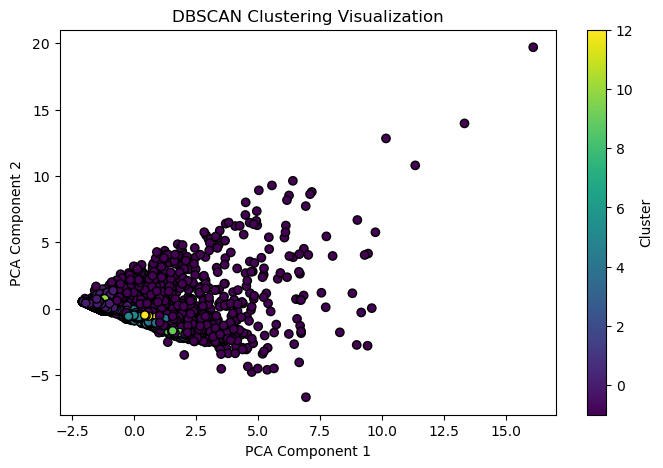

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_data_dbscan[:, 0], pca_data_dbscan[:, 1], c=data['DBSCAN_Cluster'], cmap='viridis', edgecolor='k')
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [20]:
# Hierarchical Clustering with AgglomerativeClustering
hierarchical_model = AgglomerativeClustering(n_clusters=optimal_clusters)
data['Hierarchical_Cluster'] = hierarchical_model.fit_predict(scaled_data)

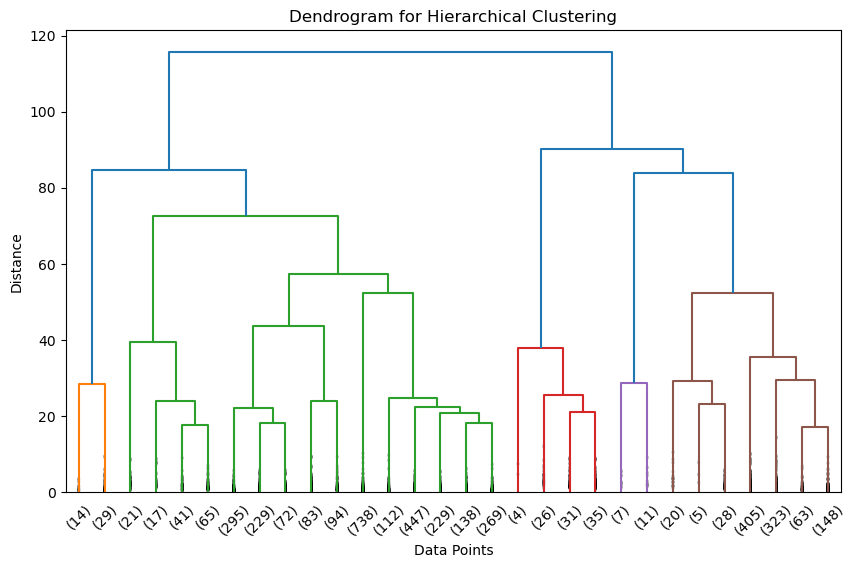

In [21]:
# Dendrogram visualization
plt.figure(figsize=(10, 6))
hierarchical_linkage = linkage(scaled_data, method='ward')
dendrogram(hierarchical_linkage, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [22]:
# Evaluating Hierarchical Clustering with silhouette score
if len(set(data['Hierarchical_Cluster'])) > 1:
    hierarchical_silhouette = silhouette_score(scaled_data, data['Hierarchical_Cluster'])
    print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")
else:
    print("Only one cluster detected in Hierarchical Clustering.")


Hierarchical Silhouette Score: 0.31619409882758315


In [23]:
# Visualizing Hierarchical Clusters in PCA space
pca_hierarchical = PCA(n_components=2)
pca_data_hierarchical = pca_hierarchical.fit_transform(scaled_data)

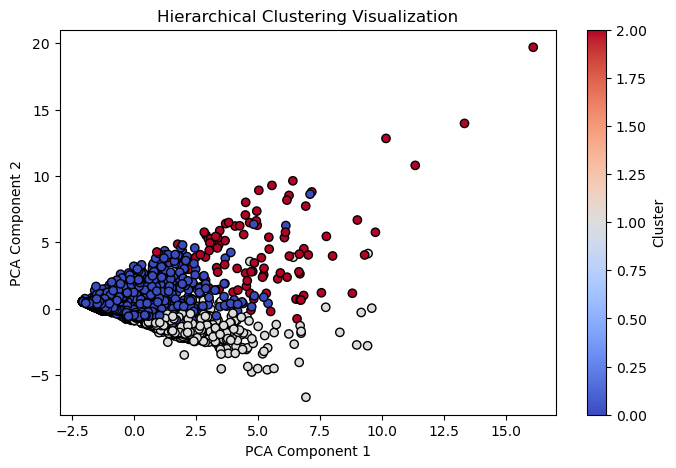

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_data_hierarchical[:, 0], pca_data_hierarchical[:, 1], c=data['Hierarchical_Cluster'], cmap='coolwarm', edgecolor='k')
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()